<a href="https://colab.research.google.com/github/Jammyeong/MachineLearning/blob/main/2ndWeek/Tugas%202_Classification%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Week 2 Machine Learning

Nama: Nisrina Nurjauza Fasya

NIM: 1103210056

## Classification model: Klasifikasi kualitas air sungai citarum

In [8]:
# Import library yang dibutuhkan

import numpy as np  # untuk perhitungan numerik
import pandas as pd  # untuk manipulasi data
import seaborn as sns
from sklearn.model_selection import train_test_split  # untuk membagi data menjadi training dan testing
from sklearn.preprocessing import StandardScaler  # untuk normalisasi fitur
from sklearn.linear_model import LogisticRegression  # untuk Logistic Regression
from sklearn.metrics import accuracy_score, classification_report  # untuk evaluasi model
import matplotlib.pyplot as plt # Mengimpor library Matplotlib untuk visualisasi
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Mengimpor LinearDiscriminantAnalysis (LDA) dari Scikit-learn
from sklearn.metrics import (
    accuracy_score,     # Mengukur akurasi model (proporsi prediksi yang benar)
    precision_score,    # Mengukur presisi model (seberapa banyak prediksi positif yang benar)
    recall_score,       # Mengukur recall model (seberapa banyak kasus positif yang ditemukan oleh model)
    f1_score,           # Menghitung F1-Score, metrik gabungan dari precision dan recall
    roc_auc_score,      # Menghitung area under curve (AUC) untuk kurva ROC, yang mengukur kinerja klasifikasi biner
    roc_curve,          # Menghasilkan data untuk plot Receiver Operating Characteristic (ROC) curve
    confusion_matrix    # Membuat matriks kebingungan (confusion matrix) untuk mengevaluasi prediksi terhadap aktual
)

In [2]:
from google.colab import drive # Mengimpor library dari Google Colab untuk mengakses Google Drive
drive.mount('/content/drive') # Memasang (mount) Google Drive ke dalam sistem file lokal di Colab

Mounted at /content/drive


In [3]:
# Load dataset
file_path = '/content/drive/MyDrive/SEMESTER 7/Machine Learning/CitarumWater.csv'
citarum_data = pd.read_csv(file_path)

# Menampilkan beberapa baris awal
citarum_data.head()


,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


In [4]:
# Menghapus kolom yang tidak diperlukan
X = citarum_data.drop(columns=['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'Class'])
y = citarum_data['Class']

# Mengubah kolom 'Temp' dari string ke float dengan menghapus '°C'
X['Temp'] = X['Temp'].str.replace('°C', '').astype(float)

# Memilih hanya kolom numerik
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Menangani nilai yang hilang dengan mengisi rata-rata setiap kolom
X_numeric = X_numeric.fillna(X_numeric.mean())

In [16]:
# Pembagian Data ke dalam Set Pelatihan dan Pengujian
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42, stratify=y)

# Standarisasi Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Melakukan fit pada data training dan sekaligus mentransformasikan (menstandardisasi) data training
X_test_scaled = scaler.transform(X_test) # Menggunakan mean dan standar deviasi yang dihitung dari data training untuk mentransformasi data test

# Konversi kembali ke DataFrame untuk menjaga nama fitur
# Setelah scaling, hasilnya berbentuk array NumPy. Konversi kembali ke DataFrame diperlukan agar kita bisa menggunakan nama fitur asli.
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Membangun dan Melatih Model Logistic Regression
# Membuat instance model Logistic Regression dengan batas maksimum iterasi sebanyak 1000
model = LogisticRegression(max_iter=1000)

# Melatih model dengan data training yang sudah distandardisasi
model.fit(X_train_scaled, y_train)

# Prediksi menggunakan model yang sudah dilatih pada data test
y_pred = model.predict(X_test_scaled)  # Prediksi kelas
y_pred_prob = model.predict_proba(X_test_scaled)  # Prediksi probabilitas untuk setiap kelas

# Menghitung Metode Evaluasi
accuracy = accuracy_score(y_test, y_pred)  # Menghitung akurasi menggunakan nilai prediksi dan nilai sebenarnya
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0) # Menghitung presisi menggunakan nilai prediksi dan nilai sebenarnya
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0) # Menghitung recall menggunakan nilai prediksi dan nilai sebenarnya
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0) # Menghitung F1-score menggunakan nilai prediksi dan nilai sebenarnya

# Untuk menghitung AUC pada klasifikasi multikelas, label harus diubah menjadi bentuk one-hot encoding
from sklearn.preprocessing import label_binarize

classes = sorted(y.unique()) # Mengambil daftar kelas dan mengurutkannya untuk one-hot encoding
y_test_binarized = label_binarize(y_test, classes=classes) # Mengubah label y_test menjadi one-hot encoded

# Menghitung AUC menggunakan ROC AUC Score untuk multiclass dengan pendekatan one-vs-rest (ovr)
auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')

# Menampilkan Hasil Evaluasi
print("Metode Evaluasi Model")
print(f"Akurasi   : {accuracy:.4f}")   # Menampilkan akurasi model
print(f"Presisi   : {precision:.4f}")  # Menampilkan presisi model
print(f"Recall    : {recall:.4f}")     # Menampilkan recall model
print(f"F1 Score  : {f1:.4f}")         # Menampilkan F1-score model
print(f"AUC       : {auc:.4f}")        # Menampilkan nilai AUC untuk ROC curve




Metode Evaluasi Model
Akurasi   : 0.9700
Presisi   : 0.9702
Recall    : 0.9700
F1 Score  : 0.9698
AUC       : 0.9983


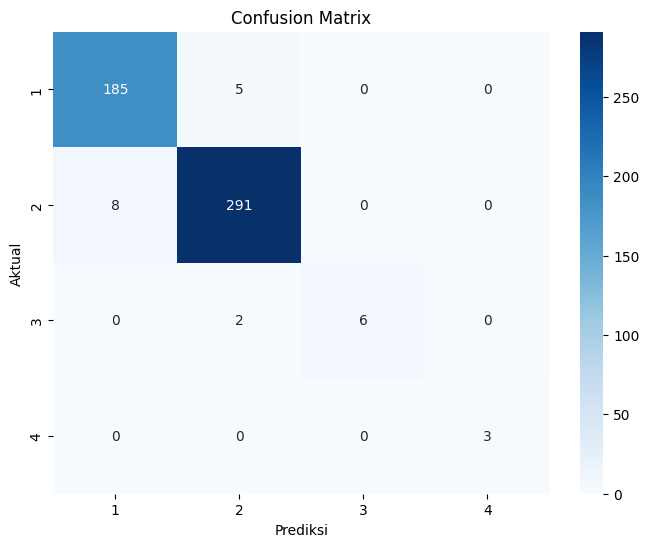

In [17]:
# Menghitung Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred) # Confusion Matrix memberikan matriks jumlah prediksi benar dan salah untuk setiap kelas

plt.figure(figsize=(8,6)) # Membuat figure baru dengan ukuran 8x6 untuk menampilkan visualisasi Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes) # Menggunakan seaborn heatmap untuk memvisualisasikan Confusion Matrix

plt.xlabel('Prediksi') # Menambahkan label pada sumbu x (horizontal), yang merepresentasikan kelas prediksi
plt.ylabel('Aktual') # Menambahkan label pada sumbu y (vertikal), yang merepresentasikan kelas aktual
plt.title('Confusion Matrix') # Menambahkan judul pada plot Confusion Matrix untuk memberikan informasi tentang apa yang sedang divisualisasikan
plt.show() # Menampilkan visualisasi heatmap Confusion Matrix ke layar


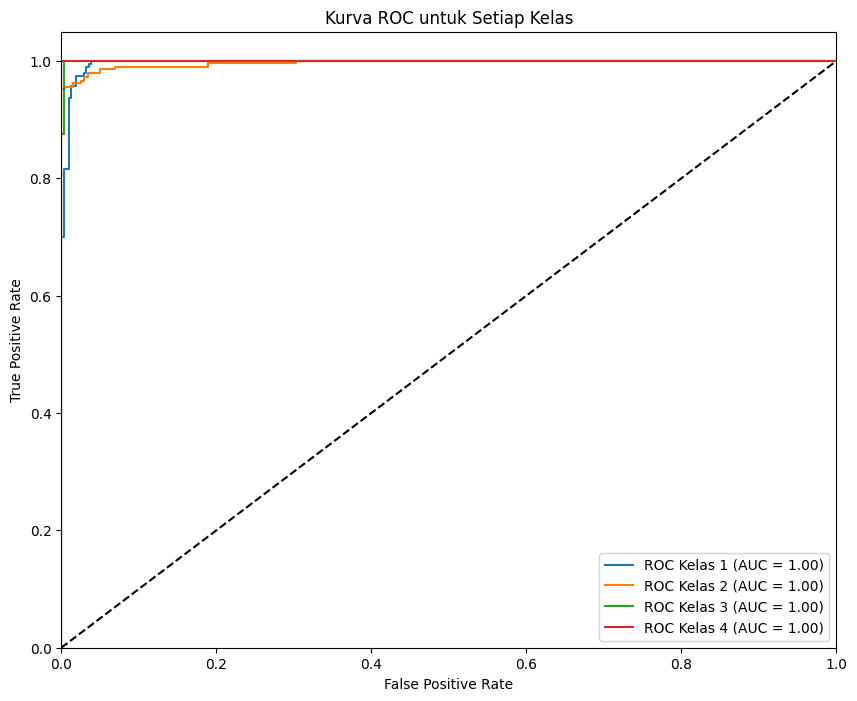

In [18]:
plt.figure(figsize=(10,8)) # Membuat figure baru dengan ukuran 10x8 untuk visualisasi Kurva ROC
for idx, class_label in enumerate(classes): # Loop untuk menghitung dan memplot kurva ROC untuk setiap kelas
    fpr, tpr, _ = roc_curve(y_test_binarized[:, idx], y_pred_prob[:, idx]) # roc_curve menghasilkan False Positive Rate (fpr) dan True Positive Rate (tpr) untuk setiap kelas
    plt.plot(fpr, tpr, label=f'ROC Kelas {class_label} (AUC = {roc_auc_score(y_test_binarized[:, idx], y_pred_prob[:, idx]):.2f})') # f'ROC Kelas {class_label} (AUC = ...)' adalah label yang menampilkan nama kelas dan nilai AUC (Area Under the Curve)

# Menambahkan garis diagonal dari (0, 0) ke (1, 1) sebagai garis referensi untuk model acak
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal
plt.xlim([0.0, 1.0]) # Mengatur batas sumbu x untuk False Positive Rate (FPR) antara 0 dan 1
plt.ylim([0.0, 1.05]) # Mengatur batas sumbu y untuk True Positive Rate (TPR) antara 0 dan 1.05
plt.xlabel('False Positive Rate') # Menambahkan label pada sumbu x, yaitu False Positive Rate (FPR)
plt.ylabel('True Positive Rate') # Menambahkan label pada sumbu y, yaitu True Positive Rate (TPR)
plt.title('Kurva ROC untuk Setiap Kelas') # Menambahkan judul untuk visualisasi ROC Curve
plt.legend(loc="lower right") # Menambahkan legenda yang menampilkan label ROC untuk setiap kelas pada sudut kanan bawah ('lower right')
plt.show() # Menampilkan plot ke layar


In [20]:
# Apply Fisher Linear Discriminant (Linear Discriminant Analysis)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

# Predictions
y_pred = lda.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.94
Precision: 0.9470933579335793
Recall: 0.94
F1 Score: 0.9405416414599718
Confusion Matrix:
 [[189   1   0   0]
 [ 27 270   2   0]
 [  0   0   8   0]
 [  0   0   0   3]]
